Knapsack DP Result: 7
Knapsack Recursive Result: 7
Logistic Regression Accuracy: 0.925
SVM Accuracy: 0.925


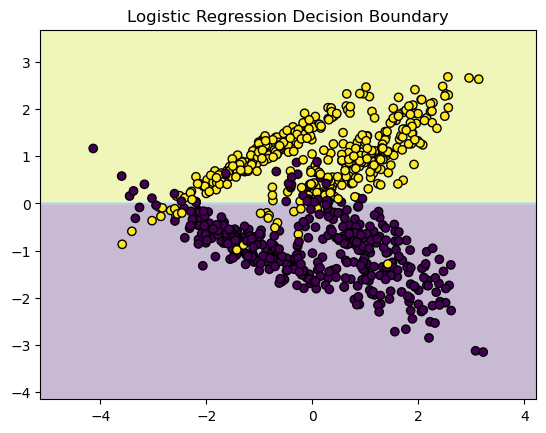

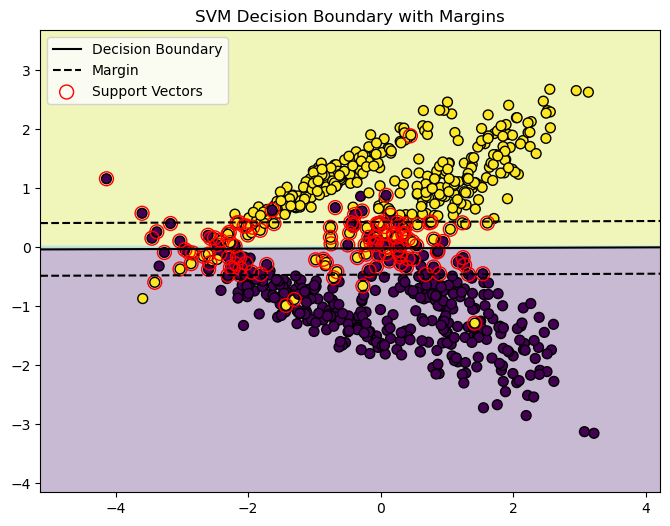

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# ---- Knapsack Problem ----
def knapsack_dp(weights, values, capacity):
    n = len(weights)
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]
    
    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if weights[i-1] <= w:
                dp[i][w] = max(values[i-1] + dp[i-1][w-weights[i-1]], dp[i-1][w])
            else:
                dp[i][w] = dp[i-1][w]
    
    return dp[n][capacity]

def knapsack_recursive(weights, values, capacity, n):
    if n == 0 or capacity == 0:
        return 0
    
    if weights[n-1] > capacity:
        return knapsack_recursive(weights, values, capacity, n-1)
    
    return max(
        values[n-1] + knapsack_recursive(weights, values, capacity - weights[n-1], n-1),
        knapsack_recursive(weights, values, capacity, n-1)
    )

# Example dataset
weights = [2, 3, 4, 5]
values = [3, 4, 5, 6]
capacity = 5

print("Knapsack DP Result:", knapsack_dp(weights, values, capacity))
print("Knapsack Recursive Result:", knapsack_recursive(weights, values, capacity, len(weights)))

# ---- SVM vs. Logistic Regression ----
# Generate synthetic dataset
X, y = make_classification(n_samples=800, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Train SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Decision Boundary Plot
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(lr, X, y, "Logistic Regression Decision Boundary")

def plot_svm_margin(model, X, y, title):
    plt.figure(figsize=(8, 6))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=50)
    
    # Get the hyperplane
    w = model.coef_[0]  # Weight vector
    b = model.intercept_[0]  # Bias term
    
    # Plot decision boundary
    x_values = np.linspace(x_min, x_max, 100)
    y_values = -(w[0] * x_values + b) / w[1]
    plt.plot(x_values, y_values, 'k-', label="Decision Boundary")
    
    # Compute and plot margins
    margin = 1 / np.sqrt(np.sum(w ** 2))
    y_margin_up = y_values + margin
    y_margin_down = y_values - margin
    plt.plot(x_values, y_margin_up, 'k--', label="Margin")
    plt.plot(x_values, y_margin_down, 'k--')

    # Plot support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                s=100, facecolors='none', edgecolors='r', label="Support Vectors")
    
    plt.legend()
    plt.title(title)
    plt.show()

plot_svm_margin(svm, X, y, "SVM Decision Boundary with Margins")
